In [74]:
packageVersion('IRdisplay')
packageVersion('IRkernel')
packageVersion('repr')

[1] ‘0.4.9000’

[1] ‘0.6’

[1] ‘0.9’

In [75]:
clean_column <- function(col) {
    col <- sapply(col, function(x) toString(x))
    col <- sapply(col, function(x) tolower(x))
    col <- sapply(col, function(x) gsub("-", "", x))
    col <- sapply(col, function(x) gsub(" ", "", x))
    return(col)
}

In [76]:
payment_per_period <- function(principal_value, interest_rate, number_of_periods) {
    interest_rate * principal_value / (1 - (1 + interest_rate)^(-number_of_periods))
}

In [77]:
MAKES_WANTED = c("toyota", "honda", "chevrolet", "mazda", "nissan", "subaru", "hyundai")
MODELS_WANTED = c("rav4", "crv", "accord", "camry", "hrv", "4runner", "rogue", "murano", "santafe")
MIN_YEAR = 2005
MAX_KILOMETERS = 200000

# Parse and Clean Data

In [78]:
raw_df = rbind(
    read.csv("data/kijiji_cars.csv")
)

raw_df = rbind(
    raw_df,
    read.csv("data/ottawahonda_cars.csv")
)

raw_df = rbind(
    raw_df,
    read.csv("data/tonygrahamtoyota_cars.csv")
)

raw_df = rbind(
    raw_df,
    read.csv("data/jimtubman_cars.csv")
)

raw_df = rbind(
    raw_df,
    read.csv("data/caronauto_cars.csv")
)

raw_df$make <- clean_column(raw_df$make)
raw_df$model <- clean_column(raw_df$model)
    
raw_df$price <- as.character(raw_df$price)
raw_df$price <- lapply(raw_df$price, function(x) gsub("\\$", "", x))
raw_df$price <- lapply(raw_df$price, function(x) gsub("\\,", "", x))
raw_df$price <- as.numeric(raw_df$price)
    
raw_df$kilometers <- as.character(raw_df$kilometers)
raw_df$kilometers <- lapply(raw_df$kilometers, function(x) gsub("km", "", x))
raw_df$kilometers <- lapply(raw_df$kilometers, function(x) gsub(",", "", x))
raw_df$kilometers <- as.numeric(raw_df$kilometers)
    
raw_df$age <- 2016 - raw_df$year
    
raw_df <- raw_df[, !(names(raw_df) %in% c("description"))]

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = c(143485, 66335, 43108, 24800, : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = c(38888L, 33318L, 53953L, 34243L, : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = c(2016L, 2015L, 1981L, 2016L, : invalid factor level, NA generatedWarning message:
In scan(file, what, nmax, sep, dec, quote, skip, nlines, na.strings, : EOF within quoted stringWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning mess

## Add Loan Data 

In [79]:
raw_df$sales_tax <- raw_df$price * 0.15
raw_df$total_price <- raw_df$price + raw_df$sales_tax
    
raw_df$five_yr_six_prcnt_monthly <- sapply(raw_df$total_price, function(x) payment_per_period(x, 0.06 / 12, 60))
raw_df$three_yr_six_prcnt_monthly <- sapply(raw_df$total_price, function(x) payment_per_period(x, 0.06 / 12, 36))
raw_df$five_yr_one_prcnt_monthly <- sapply(raw_df$total_price, function(x) payment_per_period(x, 0.01 / 12, 60))
raw_df$three_yr_one_prcnt_monthly <- sapply(raw_df$total_price, function(x) payment_per_period(x, 0.01 / 12, 36))

In [80]:
colnames(raw_df)

[1] "domain"                     "used"                      
 [3] "date_listed"                "url"                       
 [5] "make"                       "title"                     
 [7] "year"                       "kilometers"                
 [9] "model"                      "price"                     
[11] "age"                        "sales_tax"                 
[13] "total_price"                "five_yr_six_prcnt_monthly" 
[15] "three_yr_six_prcnt_monthly" "five_yr_one_prcnt_monthly" 
[17] "three_yr_one_prcnt_monthly"

## Filter Down to Desired

In [81]:
raw_df <- raw_df[raw_df$make %in% MAKES_WANTED, ]
raw_df <- raw_df[raw_df$kilometers < MAX_KILOMETERS, ]
raw_df <- raw_df[raw_df$year > MIN_YEAR, ]
nrow(raw_df)

[1] 457

## Rename

In [82]:
df <- raw_df

## Join with Fuel and Maintenance Data

In [83]:
eff <- read.csv("data/nrcan_fuel_ratings.csv")
nrow(eff)

[1] 140196

In [84]:
eff <- eff[!duplicated(eff$title), ]
eff$make <- clean_column(eff$make)
eff$model <- clean_column(eff$model)
nrow(eff)
colnames(eff)

[1] 3343

[1] "engine_size_litres"       "domain"                  
 [3] "cylinders"                "title"                   
 [5] "transmission"             "year"                    
 [7] "make"                     "ranking_overall"         
 [9] "lphkm_city"               "ranking_class"           
[11] "lphkm_hwy"                "url"                     
[13] "model_class"              "fuel"                    
[15] "estimated_fuel_cost_year" "model"

In [85]:
library(dplyr)
df <- dplyr::left_join(
    df, 
    eff, 
    by=c("make" = "make", "model" = "model", "year" = "year")
)  
nrow(df)
colnames(df)

[1] 457

[1] "domain.x"                   "used"                      
 [3] "date_listed"                "url.x"                     
 [5] "make"                       "title.x"                   
 [7] "year"                       "kilometers"                
 [9] "model"                      "price"                     
[11] "age"                        "sales_tax"                 
[13] "total_price"                "five_yr_six_prcnt_monthly" 
[15] "three_yr_six_prcnt_monthly" "five_yr_one_prcnt_monthly" 
[17] "three_yr_one_prcnt_monthly" "engine_size_litres"        
[19] "domain.y"                   "cylinders"                 
[21] "title.y"                    "transmission"              
[23] "ranking_overall"            "lphkm_city"                
[25] "ranking_class"              "lphkm_hwy"                 
[27] "url.y"                      "model_class"               
[29] "fuel"                       "estimated_fuel_cost_year"

In [86]:
maintenance <- read.csv("data/maintenance_costs_manual_collection.csv")
maintenance$make <- clean_column(maintenance$make)
maintenance$model <- clean_column(maintenance$model)
nrow(maintenance)
colnames(maintenance)

[1] 14

[1] "make"                    "model"                  
 [3] "year"                    "five_year_maintenance"  
 [5] "eight_year_maintenance"  "five_year_depreciation" 
 [7] "eight_year_depreciation" "five_year_fuel"         
 [9] "msrp_lower"              "msrp_upper"             
[11] "predicted_reliability"

In [87]:
df <- left_join(
    df, 
    maintenance, 
    by=c("make" = "make", "model" = "model", "year" = "year")
)  
nrow(df)
colnames(df)

[1] 457

[1] "domain.x"                   "used"                      
 [3] "date_listed"                "url.x"                     
 [5] "make"                       "title.x"                   
 [7] "year"                       "kilometers"                
 [9] "model"                      "price"                     
[11] "age"                        "sales_tax"                 
[13] "total_price"                "five_yr_six_prcnt_monthly" 
[15] "three_yr_six_prcnt_monthly" "five_yr_one_prcnt_monthly" 
[17] "three_yr_one_prcnt_monthly" "engine_size_litres"        
[19] "domain.y"                   "cylinders"                 
[21] "title.y"                    "transmission"              
[23] "ranking_overall"            "lphkm_city"                
[25] "ranking_class"              "lphkm_hwy"                 
[27] "url.y"                      "model_class"               
[29] "fuel"                       "estimated_fuel_cost_year"  
[31] "five_year_maintenance"      "eight_year_maintenance"    
[33] "five_year_depreciation"     "eight_year_depreciation"   
[35] "five_year_fuel"             "msrp_lower"                
[37] "msrp_upper"                 "predicted_reliability"

In [88]:
summary(df$kilometers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       5   50640   63950  110900  199500      51 

# Overview

Warning message:
: Removed 175 rows containing missing values (geom_point).

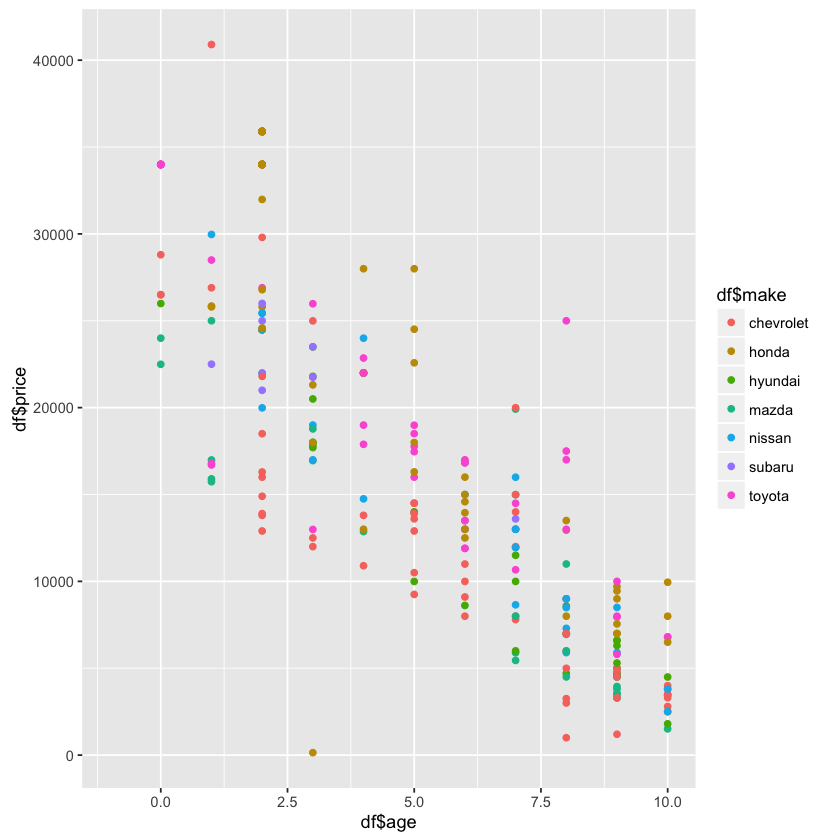

In [89]:
library(ggplot2)
ggplot(df) + geom_point(aes(x=df$age, y=df$price, colour=df$make))

# Toyota

Warning message:
: Removed 170 rows containing missing values (geom_label).

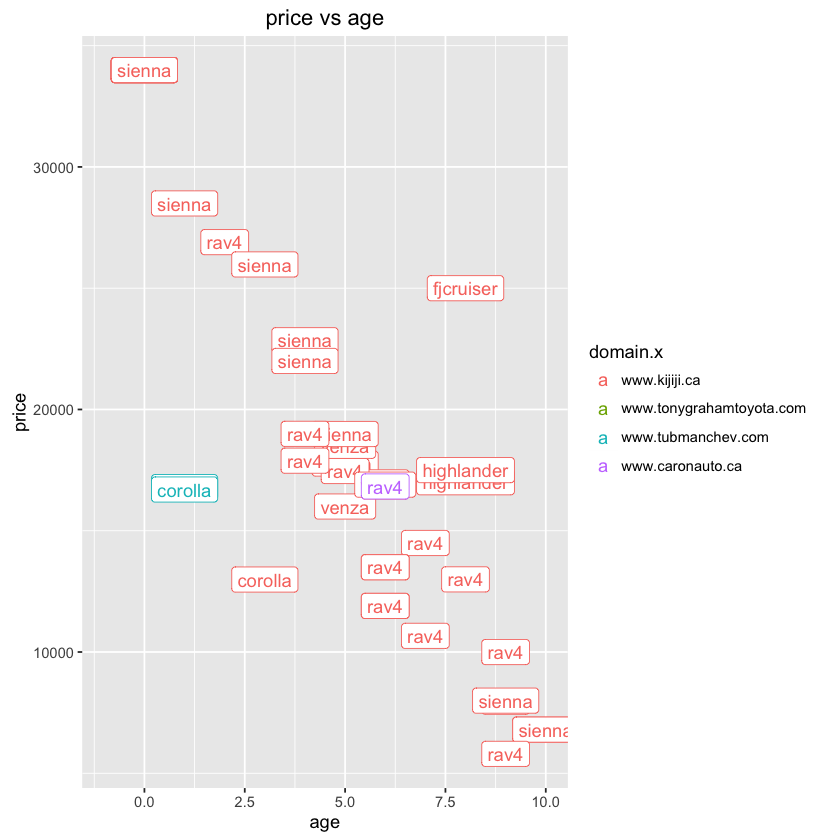

In [90]:
library(ggplot2)
plot_price_vs_age <- function(dataframe) {
    p <- ggplot(dataframe, aes(age, price, label=model, color=domain.x))
    p + geom_label() + ggtitle("price vs age")  
}
tmp <- df[df$make == "toyota", ]
plot_price_vs_age(tmp)

In [91]:
colnames(df)


[1] "domain.x"                   "used"                      
 [3] "date_listed"                "url.x"                     
 [5] "make"                       "title.x"                   
 [7] "year"                       "kilometers"                
 [9] "model"                      "price"                     
[11] "age"                        "sales_tax"                 
[13] "total_price"                "five_yr_six_prcnt_monthly" 
[15] "three_yr_six_prcnt_monthly" "five_yr_one_prcnt_monthly" 
[17] "three_yr_one_prcnt_monthly" "engine_size_litres"        
[19] "domain.y"                   "cylinders"                 
[21] "title.y"                    "transmission"              
[23] "ranking_overall"            "lphkm_city"                
[25] "ranking_class"              "lphkm_hwy"                 
[27] "url.y"                      "model_class"               
[29] "fuel"                       "estimated_fuel_cost_year"  
[31] "five_year_maintenance"      "eight_year_maintenance"    
[33] "five_year_depreciation"     "eight_year_depreciation"   
[35] "five_year_fuel"             "msrp_lower"                
[37] "msrp_upper"                 "predicted_reliability"

Warning message:
: Removed 170 rows containing missing values (geom_label).

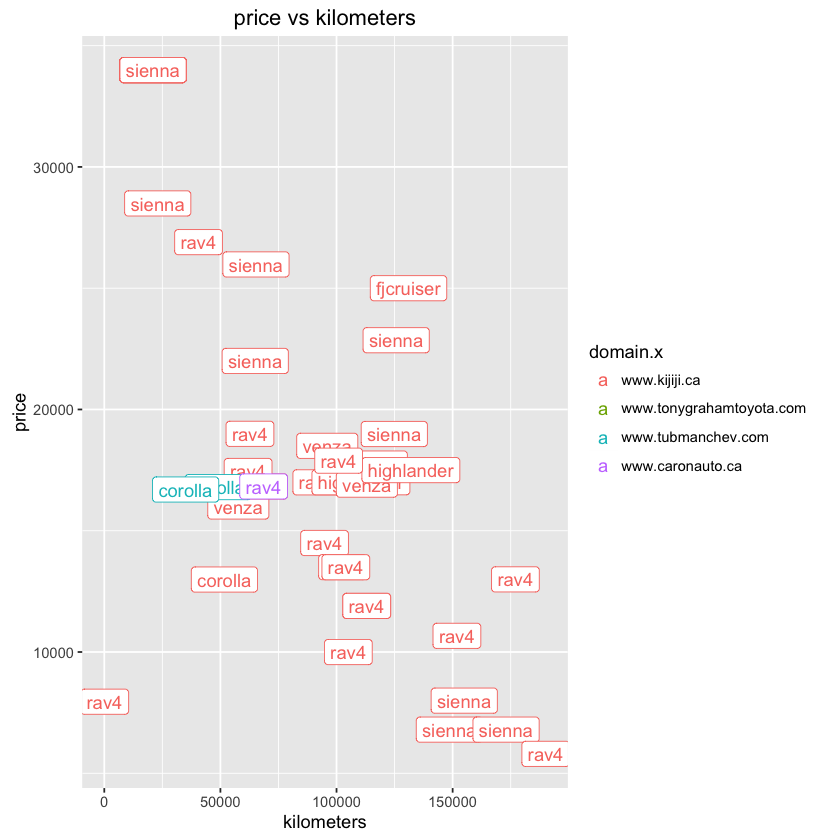

In [92]:
plot_price_vs_kilometers <- function(dataframe) {
    dataframe <- dataframe[dataframe$kilometers < 200000, ]
    p <- ggplot(dataframe, aes(kilometers, price, label=model, color=domain.x))
    p <- p + geom_label() + ggtitle("price vs kilometers")
    p
}
tmp <- df[df$make == "toyota", ]
plot_price_vs_kilometers(tmp)

# Honda

Warning message:
: Removed 53 rows containing missing values (geom_label).

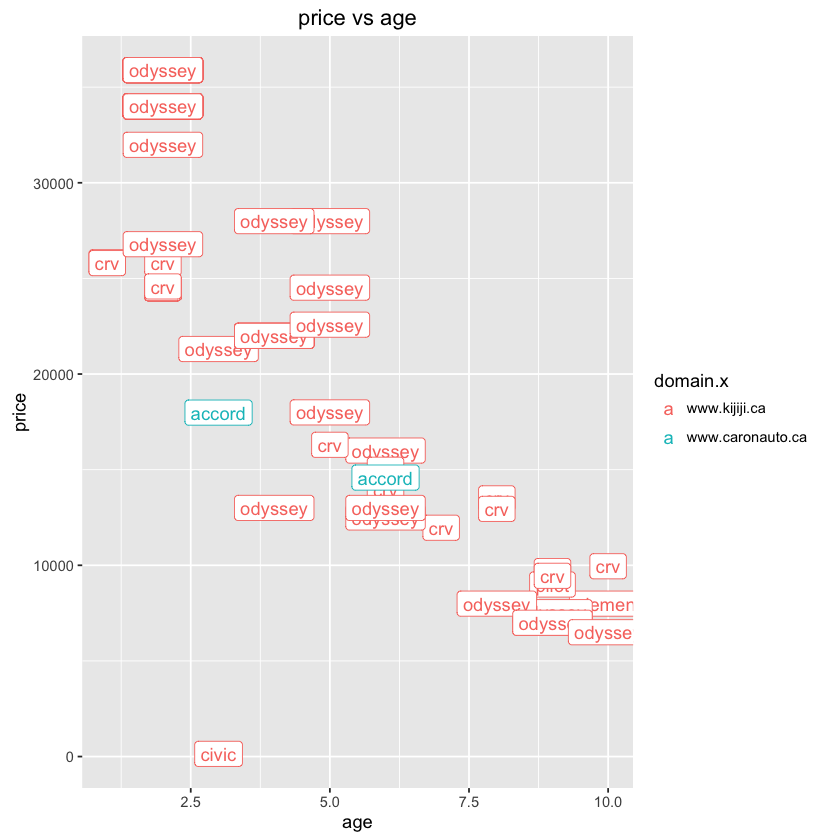

In [93]:
tmp <- df[df$make == "honda", ]
plot_price_vs_age(tmp)

Warning message:
: Removed 53 rows containing missing values (geom_label).

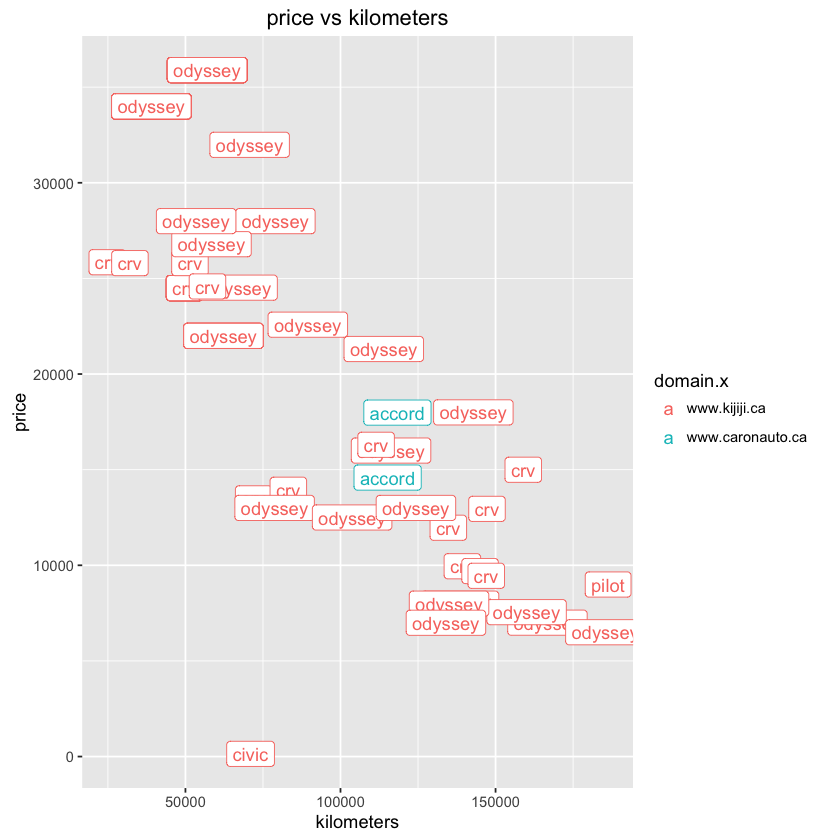

In [94]:
tmp <- df[df$make == "honda", ]
plot_price_vs_kilometers(tmp)

In [95]:
write.csv(df, file="data/output.csv")

In [96]:
sapply(df, class)

domain.x                       used 
                  "factor"                  "logical" 
               date_listed                      url.x 
                  "factor"                   "factor" 
                      make                    title.x 
               "character"                   "factor" 
                      year                 kilometers 
                 "integer"                  "numeric" 
                     model                      price 
               "character"                  "numeric" 
                       age                  sales_tax 
                 "numeric"                  "numeric" 
               total_price  five_yr_six_prcnt_monthly 
                 "numeric"                  "numeric" 
three_yr_six_prcnt_monthly  five_yr_one_prcnt_monthly 
                 "numeric"                  "numeric" 
three_yr_one_prcnt_monthly         engine_size_litres 
                 "numeric"                  "numeric" 
                  domain.y                  cylinders 
                  "factor"                  "integer" 
                   title.y               transmission 
                  "factor"                   "factor" 
           ranking_overall                 lphkm_city 
                  "factor"                  "numeric" 
             ranking_class                  lphkm_hwy 
                  "factor"                  "numeric" 
                     url.y                model_class 
                  "factor"                   "factor" 
                      fuel   estimated_fuel_cost_year 
                 "numeric"                   "factor" 
     five_year_maintenance     eight_year_maintenance 
                 "integer"                  "integer" 
    five_year_depreciation    eight_year_depreciation 
                 "integer"                  "integer" 
            five_year_fuel                 msrp_lower 
                 "integer"                  "integer" 
                msrp_upper      predicted_reliability 
                 "integer"                  "integer"